In [ ]:
import json
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datastorefinalclean.csv to datastorefinalclean.csv


In [ ]:
dataframe = pd.read_csv('datastorefinalclean.csv', encoding= 'unicode_escape')

In [ ]:
dataframe.Tweet = dataframe.Tweet.astype(str)

In [ ]:
dataframe['Sentiment'] = dataframe['Sentiment'].replace(['POSITIVE'], int(1))
dataframe['Sentiment'] = dataframe['Sentiment'].replace(['NEGATIVE'], int(0))

In [ ]:
# print(dataframe['Sentiment'])

In [ ]:
# print(dataframe['Tweet'])

In [ ]:
tweets = dataframe['Tweet'].to_list()
labels = dataframe['Sentiment'].to_list()

In [ ]:
vocab_size = 8000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 25000

In [ ]:
training_sentences = tweets[0:training_size]
testing_sentences = tweets[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# print(word_index)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           128000    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 128,433
Trainable params: 128,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

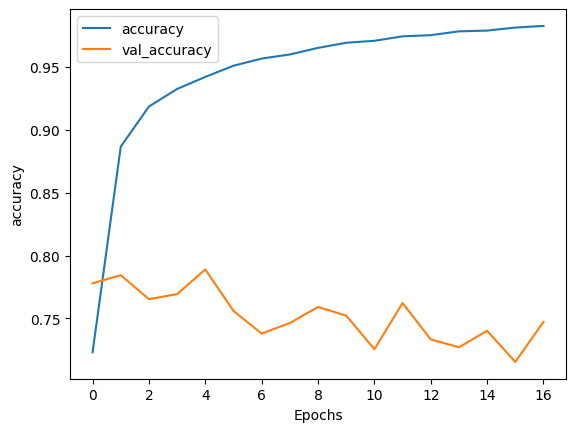

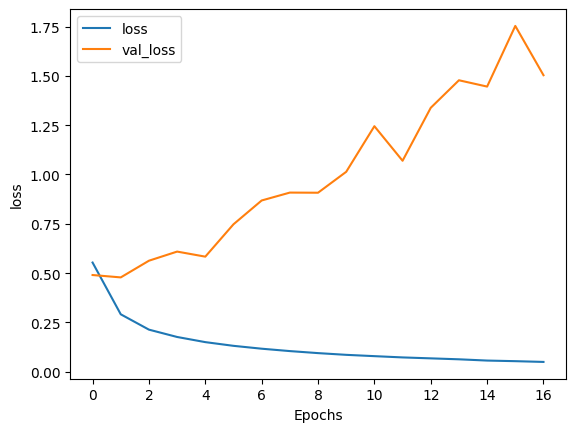

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])

  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ["@NarendraModi Only Modi can change India #PMOIndia #BJP4India", "Shame on BJP Government @NarendraModi"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 179ms/step
[[8.6016428e-01]
 [4.1104967e-04]]


In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter

query = "#DonaldTrump until:2020-8-31 since:2020-8-1 lang:en"

tweetslist = []
limit = 30000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    if(len(tweetslist) == limit):
        break

    else:
        tweetslist.append(tweet.rawContent)

sequences = tokenizer.texts_to_sequences(tweetslist)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))


In [ ]:
p,n,neu = 0,0,0
for i in range(0,len(tweetslist)):
  if model.predict(padded)[i][0] > 0.05:
    p=p+1
  elif model.predict(padded)[i][0] < 0.0005:
    n=n+1
  else:
    neu = neu+1

print(p,n,neu)

